In [1]:
import numpy as np
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS
from sklearn.decomposition import PCA, KernelPCA
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.neighbors import NearestNeighbors

In [2]:
categ = ['rec.autos', 'rec.motorcycles', 'sci.crypt', 'sci.electronics', 'sci.med']

In [3]:
my_dataset = fetch_20newsgroups(categories=categ)

In [4]:
# REMOVE ENGLISH STOP WORDS - AND, THE etc.
vectorizer = TfidfVectorizer(stop_words='english', min_df=3)
vectors = vectorizer.fit_transform(my_dataset.data)

In [5]:
print(vectors.shape)

(2972, 15092)


In [6]:
X = vectors.toarray()
Y = my_dataset.target
LABELS = my_dataset.target_names

In [7]:
def show_chart(points, classes, labels, figsize=(12, 12)):
    target_ids = range(len(labels))

    plt.figure(figsize=figsize)
    for i, label in zip(target_ids, labels):
        plt.scatter(points[classes==i, 0], points[classes==i, 1], label=label)

    plt.legend()
    plt.show()

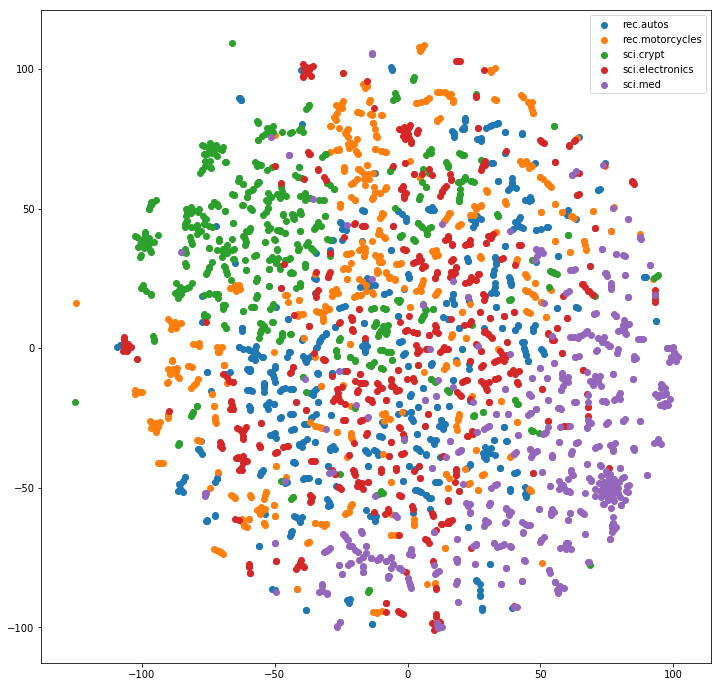

In [13]:
tsne = TSNE(method='exact')
x_tsne = tsne.fit_transform(X)
show_chart(x_tsne, Y, LABELS)

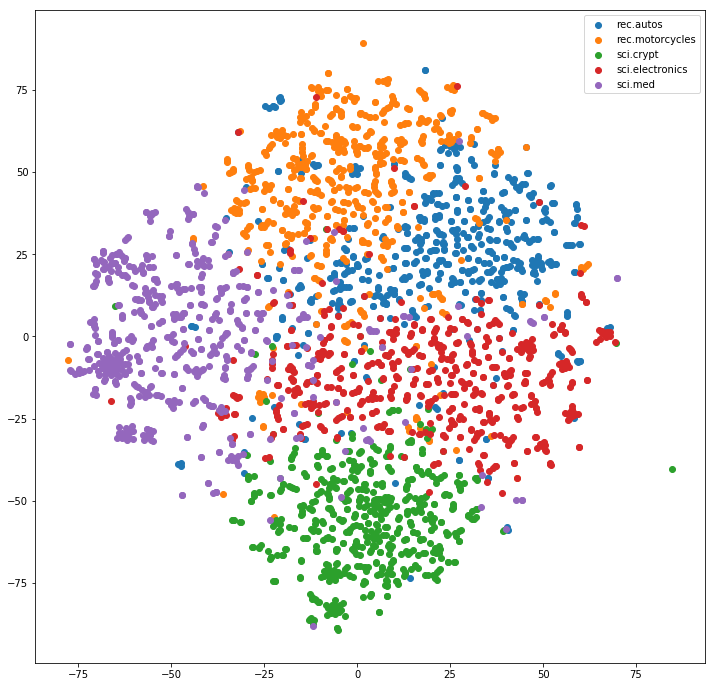

In [14]:
bhsne = TSNE(method='barnes_hut')
x_bhsne = bhsne.fit_transform(X)
show_chart(x_bhsne, Y, LABELS)

In [8]:
x_dim30 = PCA(n_components=30).fit_transform(X)
print(x_dim30.shape)

(2972, 30)


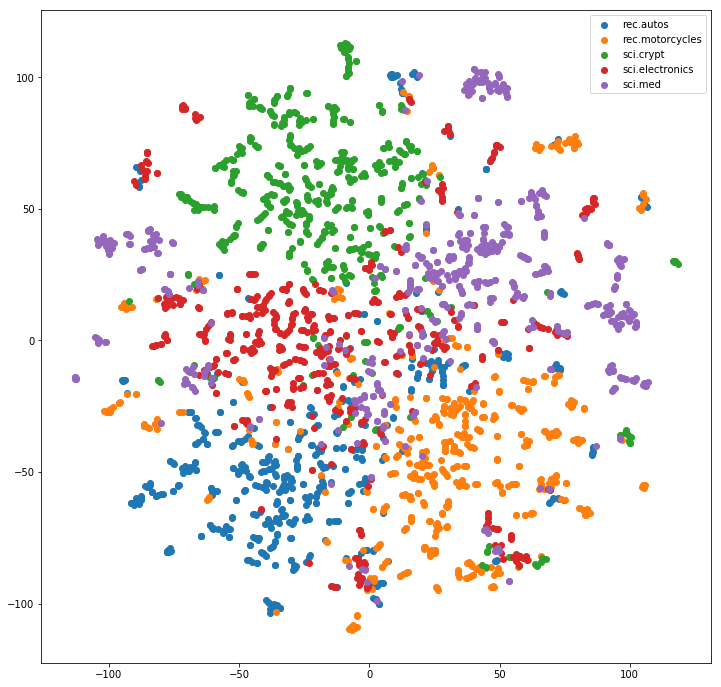

In [11]:
tsne = TSNE(method='exact', perplexity=5)
x_dim30_tsne = tsne.fit_transform(x_dim30)
show_chart(x_dim30_tsne, Y, LABELS)

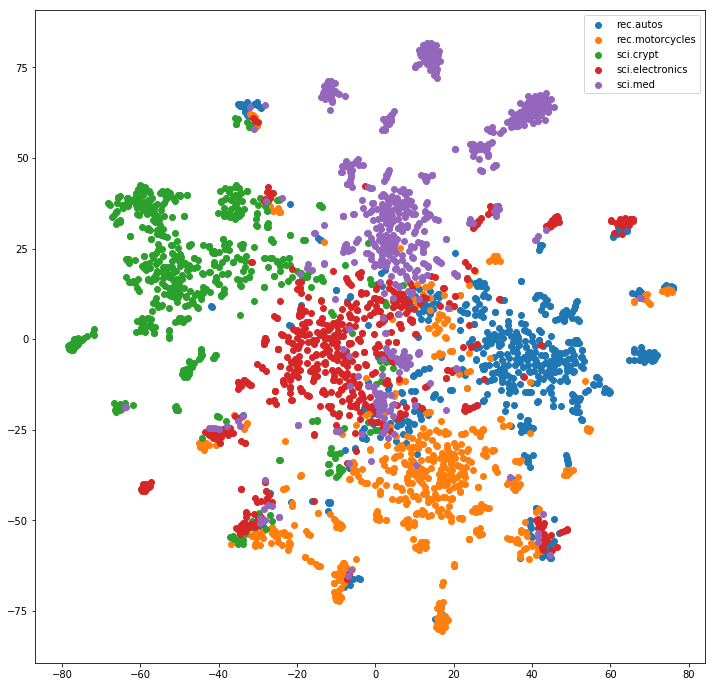

In [10]:
tsne = TSNE(method='exact', perplexity=50)
x_dim30_tsne = tsne.fit_transform(x_dim30)
show_chart(x_dim30_tsne, Y, LABELS)

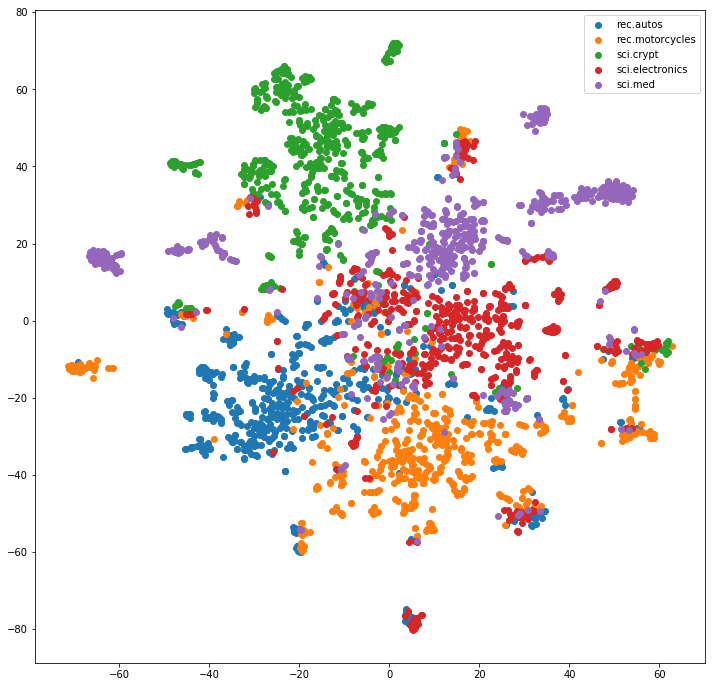

In [18]:
x_dim30_bhsne = bhsne.fit_transform(x_dim30)
show_chart(x_dim30_bhsne, Y, LABELS)

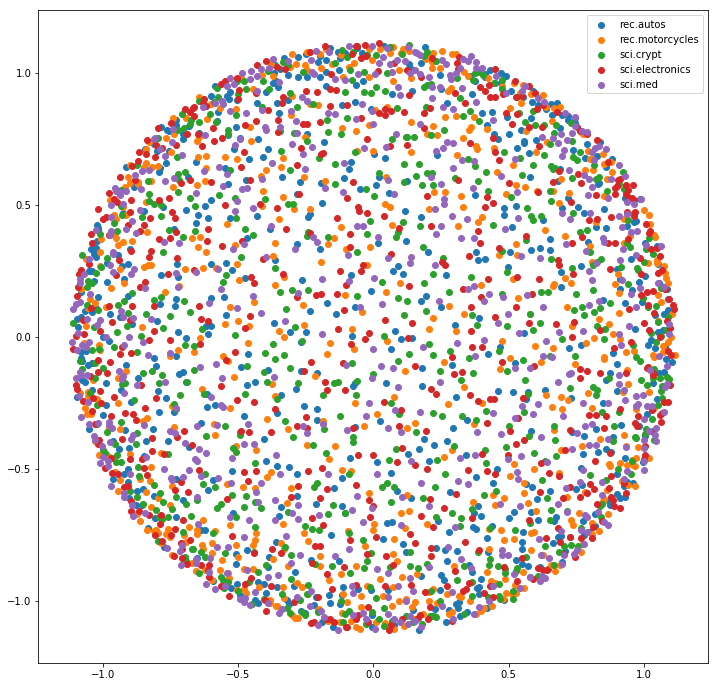

In [19]:
x_mds = MDS(n_components=2, max_iter=10).fit_transform(X)
show_chart(x_mds, Y, LABELS)

In [20]:
# METRYKI
def near_nei(k, samples):    
    nbrs = NearestNeighbors(k+1, algorithm='ball_tree').fit(samples)
    distances, indexes = nbrs.kneighbors(samples)
    res = []
    for index in indexes:
      tmp = samples.shape[0]
      if index[0] < (tmp)/2:
        res.append((len(list(filter(lambda x: x < len(samples)/2, index)))-1)/k)
      else:
        res.append((len(list(filter(lambda x: x >= len(samples)/2, index)))-1)/k)
      
    return np.mean(res)


def knn(k, n ,samples, method, M):
    nbrs_n_dim = NearestNeighbors(k, algorithm='ball_tree').fit(samples)
    _, indexes_in_n_dim = nbrs_n_dim.kneighbors(samples)
    samples_in_2_dim = method.fit_transform(samples)
    nbrs_2_dim = NearestNeighbors(k, algorithm='ball_tree').fit(samples_in_2_dim)
    _, indexes_in_2_dim = nbrs_2_dim.kneighbors(samples_in_2_dim)
    same_neighbors = 0
    for a,b in zip(indexes_in_n_dim,indexes_in_2_dim):
        same_neighbors += len(set(a).intersection(set(b)))
    return same_neighbors/(k*M)

In [ ]:
print("TSNE", near_nei(15, x_tsne))
print("BHSNE", near_nei(15, x_bhsne))
print("TSNE", knn(3, 3, X, tsne, len(X)))
print("BHSNE", knn(3, 3, X, bhsne, len(X)))

TSNE 0.5041947061462538
BHSNE 0.5075145805293855
TSNE 0.7899282189322566


# xd

## xdd